In [3]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
# from pyedflib import highlevel
from sklearn.decomposition import PCA, FastICA
import numpy as np
import os
import mne
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from srcs.preprocessing import retrieve_data, parse_filter_data
PATH='/mnt/nfs/homes/thoberth/sgoinfre/MNE-eegbci-data/files/eegmmidb/1.0.0/'
# PATH='data/MNE-eegbci-data/files/eegmmidb/1.0.0/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = retrieve_data(PATH)

  0%|          | 0/40 [00:00<?, ?it/s]

# Separate both type of labels and standardize value

In [5]:
# Must optimize this part of preprocessing
X, y = parse_filter_data(data.copy(), 'mne')
X.shape, y.shape

mne normalisation ...
<class 'numpy.ndarray'> (64, 8286720)


((6289, 64, 113), (6289,))

## Reshape les données pour les rendre en 2D

In [6]:
# (n_epochs, n_channels * n_times)
X = X.reshape(X.shape[0], -1)
X.shape

(6289, 7232)

# Show explained variance for each number of component

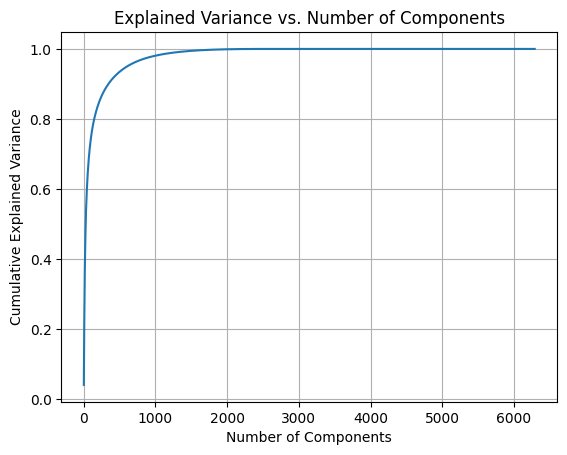

In [7]:
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

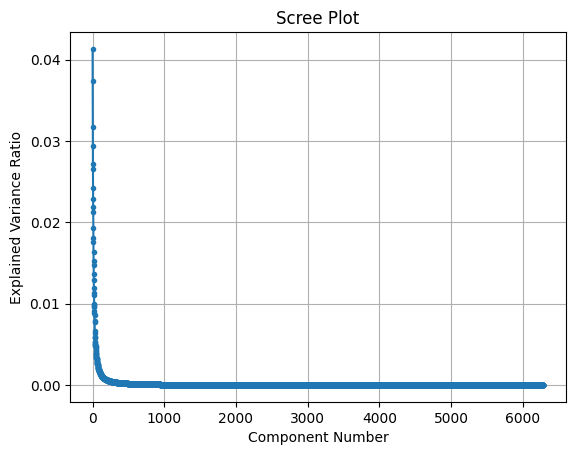

In [8]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', markersize=3)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

plt.show()

# Define the n components after analysis

In [ ]:
n_components = 250

# Dimension Reduction using PCA

In [ ]:
XReducted = PCA(n_components=n_components).fit_transform(X)

# Dimension reduction using CSP

In [ ]:
from mne.decoding import CSP
XReducted = CSP(n_components=10).fit_transform(X, y)
XReducted.shape

# Classification Algo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(XReducted, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Score de precisions :", accuracy_score(y_test, y_pred))

# LogisticRegression

In [ ]:
classifier = LogisticRegression(random_state=42, verbose=False)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Score de precisions :", accuracy_score(y_test, y_pred))

# SVC

In [ ]:
classifier = SVC(random_state=42, verbose=False)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Score de precisions :", accuracy_score(y_test, y_pred))